# Importando os transcritos

In [1]:
from bs4 import BeautifulSoup

In [2]:
with open('HTML_born_in_flames.txt', 'r') as file:
    html = file.read()

soup = BeautifulSoup(html, 'html.parser')

#Achando todos com a classe 'script-line'
script_lines = soup.find_all('p', class_='script-line')

#Extraindo os textos dentro de todas as classes span
born_in_phrases = []
for line in script_lines:
    phrase = ' '.join(span.get_text() for span in line.find_all('span'))
    born_in_phrases.append(phrase)

In [3]:
with open('HTML_but_im_a_cheerleader.txt', 'r') as file:
    html = file.read()

soup = BeautifulSoup(html, 'html.parser')

#Achando todos com a classe 'script-line'
script_lines = soup.find_all('p', class_='script-line')

#Extraindo os textos dentro de todas as classes span
but_im_a_phrases = []
for line in script_lines:
    phrase = ' '.join(span.get_text() for span in line.find_all('span'))
    but_im_a_phrases.append(phrase)

In [4]:
with open('HTML_welcome_to_the_doll_house.txt', 'r') as file:
    html = file.read()

soup = BeautifulSoup(html, 'html.parser')

#Achando todos com a classe 'script-line'
script_lines = soup.find_all('p', class_='script-line')

#Extraindo os textos dentro de todas as classes span
dollhouse_phrases = []
for line in script_lines:
    phrase = ' '.join(span.get_text() for span in line.find_all('span'))
    dollhouse_phrases.append(phrase)

In [5]:
with open('HTML_idaho.txt', 'r') as file:
    html = file.read()

soup = BeautifulSoup(html, 'html.parser')

#Achando todos com a classe 'script-line'
script_lines = soup.find_all('p', class_='script-line')

#Extraindo os textos dentro de todas as classes span
idaho_phrases = []
for line in script_lines:
    phrase = ' '.join(span.get_text() for span in line.find_all('span'))
    idaho_phrases.append(phrase)

In [6]:
with open('HTML_thelma_louise.txt', 'r') as file:
    html = file.read()

soup = BeautifulSoup(html, 'html.parser')

#Achando todos com a classe 'script-line'
script_lines = soup.find_all('p', class_='script-line')

#Extraindo os textos dentro de todas as classes span
th_and_lou_phrases = []
for line in script_lines:
    phrase = ' '.join(span.get_text() for span in line.find_all('span'))
    th_and_lou_phrases.append(phrase)

In [7]:
with open('HTML_threesome.txt', 'r') as file:
    html = file.read()

soup = BeautifulSoup(html, 'html.parser')

#Achando todos com a classe 'script-line'
script_lines = soup.find_all('p', class_='script-line')

#Extraindo os textos dentro de todas as classes span
threesome_phrases = []
for line in script_lines:
    phrase = ' '.join(span.get_text() for span in line.find_all('span'))
    threesome_phrases.append(phrase)

In [8]:
with open('poison_scrpt.txt', 'r', encoding='utf-8') as file:
    poison_script = file.read()
lines = poison_script.split('\n')
dialogue = []
for line in lines:
    # Verifica se é um nome (geralmente em caixa alta)
    if line.isupper():
        continue
    # Se não, adiciona a fala na lista
    dialogue.append(line.strip())
poison_dialogue_text = ' '.join(dialogue)

In [9]:
with open('priscilla_script.txt', 'r', encoding='utf-8') as file:
    priscilla_script = file.read()
lines = priscilla_script.split('\n')
dialogue = []
for line in lines:
    # Verifica se é um nome (geralmente em caixa alta)
    if line.isupper():
        continue
    # Se não, adiciona a fala na lista
    dialogue.append(line.strip())
priscilla_text = ' '.join(dialogue)

In [10]:
with open('paris_is_burning_scrpt.txt', 'r', encoding='utf-8') as file:
    paris_is_burning_scrpt = file.read()
lines = paris_is_burning_scrpt.split('\n')
dialogue = []
for line in lines:
    # Verifica se é um nome (geralmente em caixa alta)
    if line.isupper():
        continue
    # Se não, adiciona a fala na lista
    dialogue.append(line.strip())
paris_is_burning_text = ' '.join(dialogue)

In [11]:
with open('l.i.e_script.txt', 'r', encoding='utf-8') as file:
    lie_scrpt = file.read()
lines = lie_scrpt.split('\n')
dialogue = []
for line in lines:
    # Verifica se é um nome (geralmente em caixa alta)
    if line.isupper():
        continue
    # Se não, adiciona a fala na lista
    dialogue.append(line.strip())
lie_text = ' '.join(dialogue)

# Reunindo todas as falas em uma única lista

In [12]:
#Removendo '...' e separando em listas os que precisam
paris_is_lines = paris_is_burning_text.replace('...', '').split('.')
poison_lines = poison_dialogue_text.replace('...', '').split('.')
lie_lines = lie_text.replace('...', '').split('.')
priscilla_lines = priscilla_text.replace('...', '').split('.')

#Reunindo
all_lines = poison_lines + paris_is_lines + born_in_phrases + but_im_a_phrases + dollhouse_phrases + priscilla_lines + lie_lines + threesome_phrases + th_and_lou_phrases + idaho_phrases


# Importando Bibliotecas

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import spacy
import gensim
from wordcloud import WordCloud
import os
from gensim.models import Word2Vec

# Tokenizando e Treinando o modelo w2v

In [18]:
#definindo tokenizador do spacy
nlp = spacy.load('en_core_web_sm')
sentences_token = [] 

for sentence in all_lines: #Para cada fala em todos os filmes
    tokens = nlp(sentence)
    filtered_tokens = [t.lemma_ for t in tokens if #lemmarizada
                      t.is_alpha and \
                      not t.is_punct and \
                      not t.is_space and \
                      not t.is_stop and \
                      t.pos_ in ['NOUN', 'VERB', 'ADJ']]   #Deve ser verbo, adj e substantivo
    sentences_token.append(filtered_tokens) #Adiciona uma lista de tokens da fala.

In [19]:
new_queer_model = Word2Vec(
    sentences=sentences_token, 
    vector_size=200,  # Tamanho dos vetores
    window=5,         # Janela de leitura
    min_count=5,      
    epochs=1,        #Apenas uma época para evitar propagação de ruídos
    workers=4
)

In [20]:
def wordcloud_related_nouns(word, savefig=False):
    related = new_queer_model.wv.most_similar(word, topn=100)
    nouns=[]
    for a in range(len(related)):
        tokens = nlp(related[a][0])
        for token in tokens:
            if token.pos_ == 'NOUN':
                nouns.append(related[a])
    dic = {word: value for word, value in nouns}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dic)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    if savefig == True:
        nome_arquivo = f'{word}_related_nouns.png'
        plt.savefig(nome_arquivo, dpi=300, format='png')
    plt.show()

In [21]:
def wordcloud_related_nouns_two_words(word1, word2, savefig=False):
    related = new_queer_model.wv.most_similar(positive=[word1, word2], topn=100)
    nouns=[]
    for a in range(len(related)):
        tokens = nlp(related[a][0])
        for token in tokens:
            if token.pos_ == 'NOUN':
                nouns.append(related[a])
    dic = {word: value for word, value in nouns}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dic)
    # Display the generated image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    if savefig == True:
        nome_arquivo = f'{word1}_{word2}_related_nouns.png'
        plt.savefig(nome_arquivo, dpi=300, format='png')
    plt.show()

In [22]:
def wordcloud_related_adjs_(word,savefig=False):
    related = new_queer_model.wv.most_similar(word, topn=500)
    nouns=[]
    for a in range(len(related)):
        tokens = nlp(related[a][0])
        for token in tokens:
            if token.pos_ == 'ADJ':
                nouns.append(related[a])
    dic = {word: value for word, value in nouns}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dic)
    # Display the generated image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")  # Remove axes
    if savefig == True:
        nome_arquivo = f'{word}_related_adjs.png'
        plt.savefig(nome_arquivo, dpi=300, format='png')
    plt.show()

# WordClouds

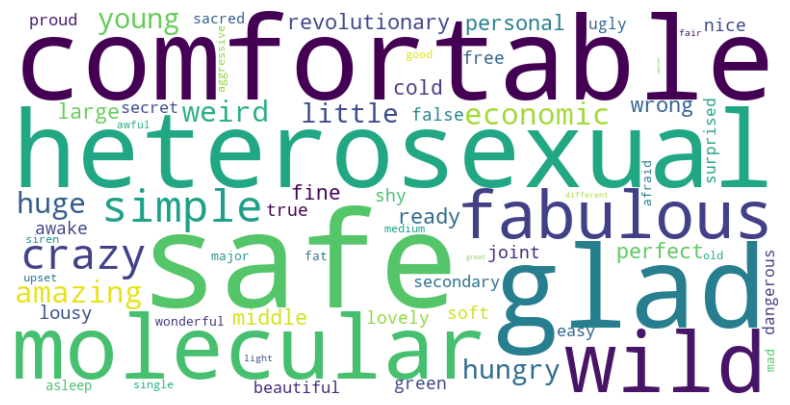

In [23]:
wordcloud_related_adjs_('gay', savefig=True)

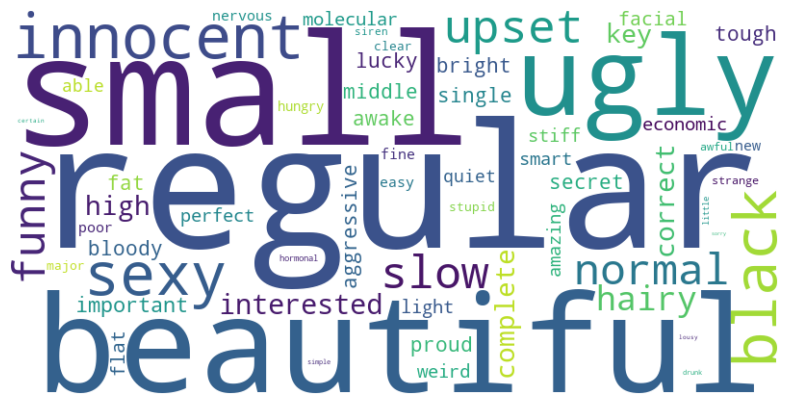

In [24]:
wordcloud_related_adjs_('lesbian', savefig=True)

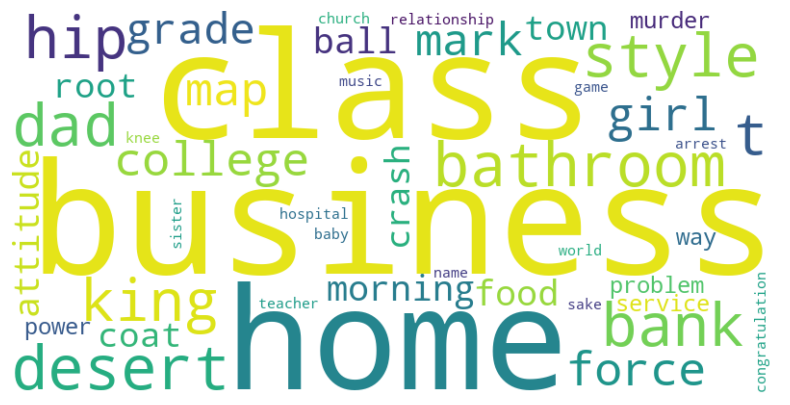

In [25]:
wordcloud_related_nouns_two_words('gay', 'hot', savefig=True)

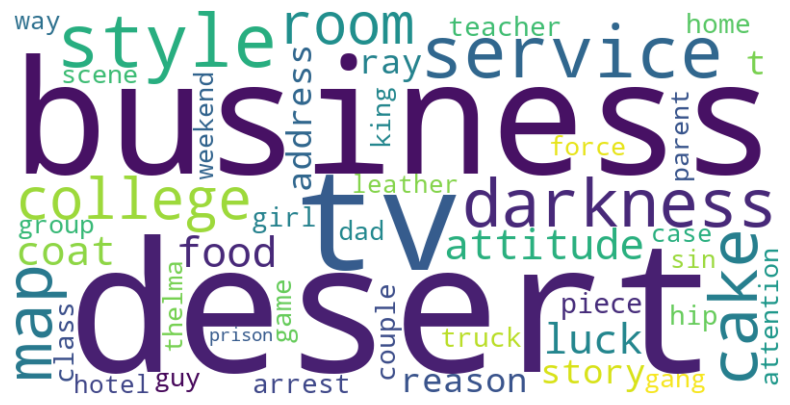

In [26]:
wordcloud_related_nouns('gay', savefig = True)